In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
# plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv(r"C:\Users\abhay.bhandari\Jupyter files\Book.csv")
df.head()

,Invoice Date,Invoice Amount
0,12/17/2019,"$11,424.60"
1,12/18/2019,"$15,120.35"
2,12/24/2019,"$14,060.80"
3,12/27/2019,"$7,749.65"
4,12/30/2019,$507.00


In [3]:
df.describe()

,Invoice Date,Invoice Amount
count,292,292
unique,292,289
top,12/17/2019,$180.00
freq,1,2


In [4]:
df = df.set_index('Invoice Date')
df.index = pd.to_datetime(df.index)

In [5]:
df['Invoice Amount'] = df['Invoice Amount'].str.replace('$', '').str.replace(',', '').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 292 entries, 2019-12-17 to 2023-08-18
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Invoice Amount  292 non-null    float64
dtypes: float64(1)
memory usage: 4.6 KB


C:\Users\abhay.bhandari\AppData\Local\Temp\ipykernel_16576\2482273543.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Invoice Amount'] = df['Invoice Amount'].str.replace('$', '').str.replace(',', '').astype(float)


In [6]:
df.head()

,Invoice Amount
Invoice Date,
2019-12-17,11424.60
2019-12-18,15120.35
2019-12-24,14060.80
2019-12-27,7749.65
2019-12-30,507.00


<Axes: title={'center': 'Admire Care LLC'}, xlabel='Invoice Date'>

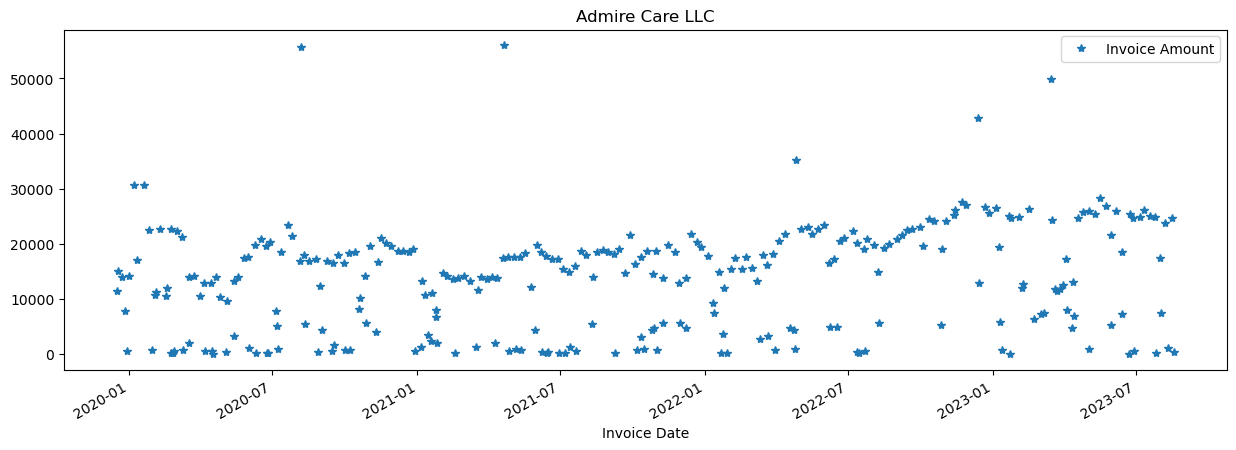

In [7]:
df.plot(style = '*', figsize = (15,5) , title = "Admire Care LLC")

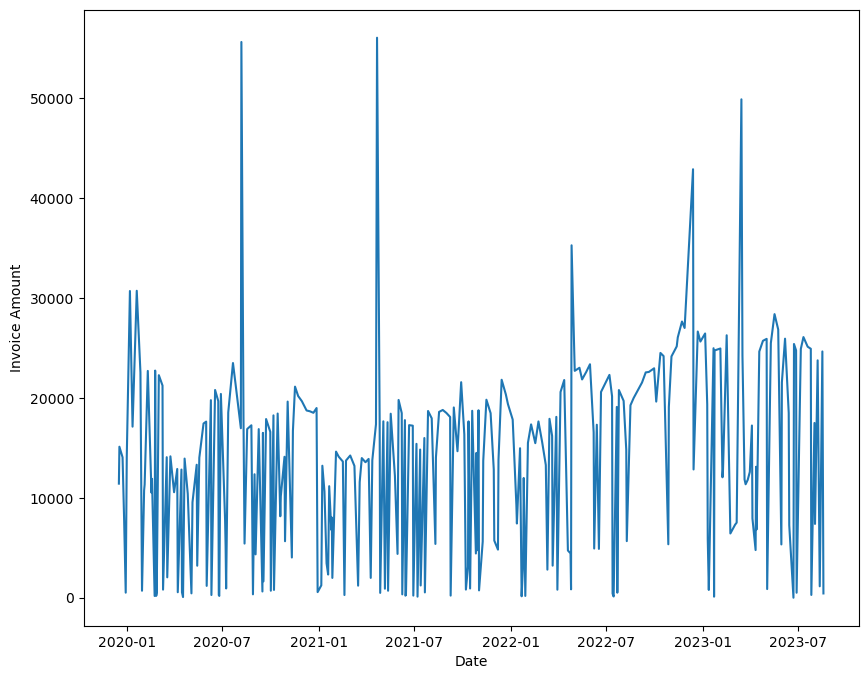

In [8]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.xlabel('Date')
plt.ylabel('Invoice Amount')
plt.plot(df)

<Axes: ylabel='Frequency'>

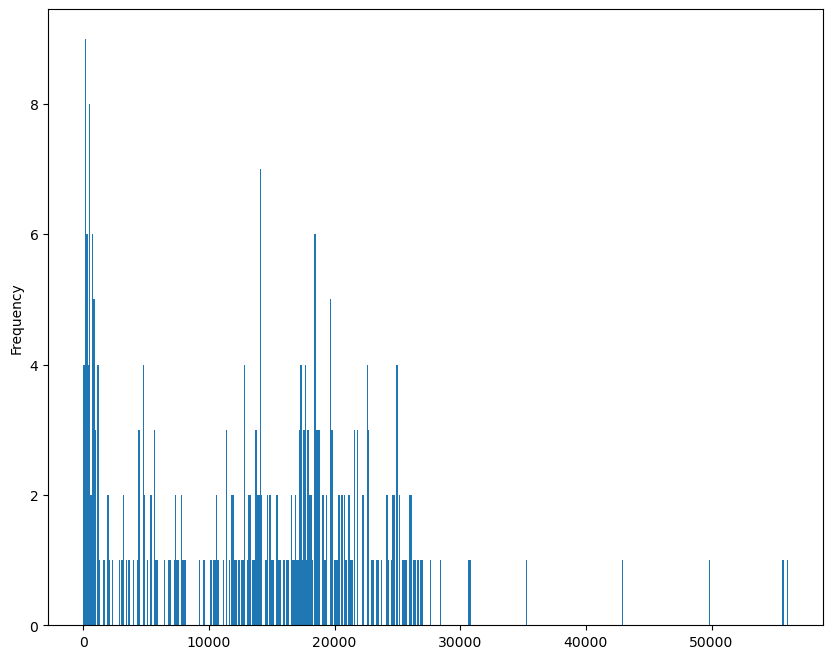

In [9]:
df['Invoice Amount'].plot(kind = 'hist', bins = 500)

###  Smoothing

can be done using moving averages

<Axes: xlabel='Invoice Date'>

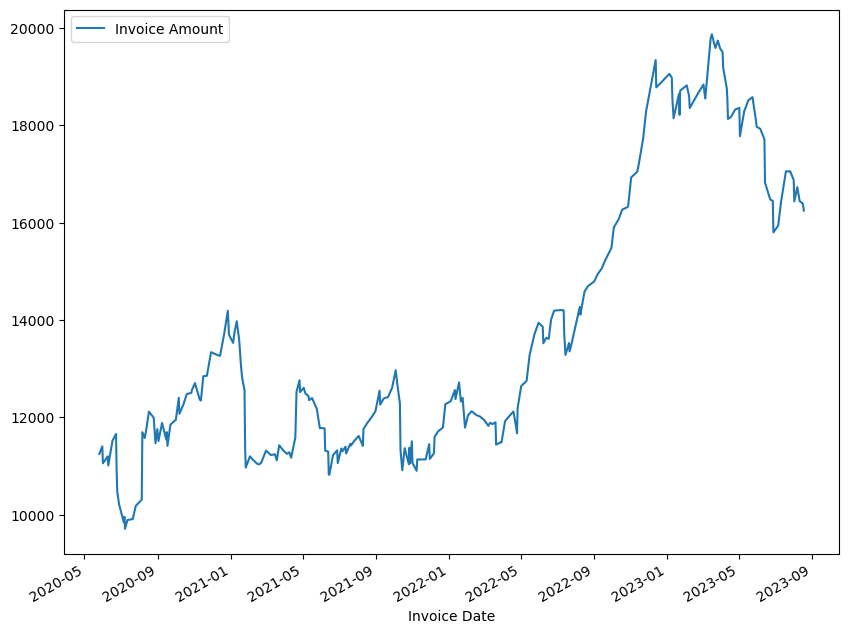

In [10]:
mean_invoice = df.rolling(window = 40).mean()
mean_invoice.plot()

In [11]:
value = pd.DataFrame(df.values)
df_shifted = pd.concat([value , value.shift(1)], axis = 1)
df_shifted.head()

,0,0
0,11424.60,NaN
1,15120.35,11424.60
2,14060.80,15120.35
3,7749.65,14060.80
4,507.00,7749.65


In [12]:
df_shifted.columns = ['Actual_Invoice', 'Forecasted_Invoice']
df_shifted.head()

,Actual_Invoice,Forecasted_Invoice
0,11424.60,NaN
1,15120.35,11424.60
2,14060.80,15120.35
3,7749.65,14060.80
4,507.00,7749.65


###  Calculation of error by using RMSE, MSE

In [13]:
df_error = mean_squared_error(df_shifted.Actual_Invoice , df_shifted.Forecasted_Invoice.fillna(0))
print(df_error," And RMSE IS :",np.sqrt(df_error))

171084430.36615548  And RMSE IS : 13079.92470796967


#### ARIMA MODEL CREATION

It will remove the error and will try to create a stationary series

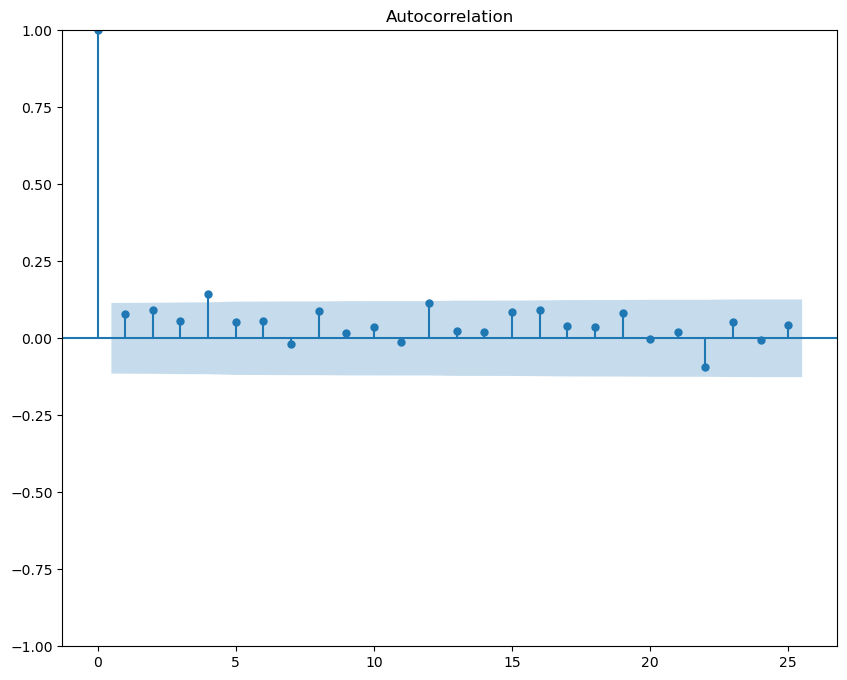

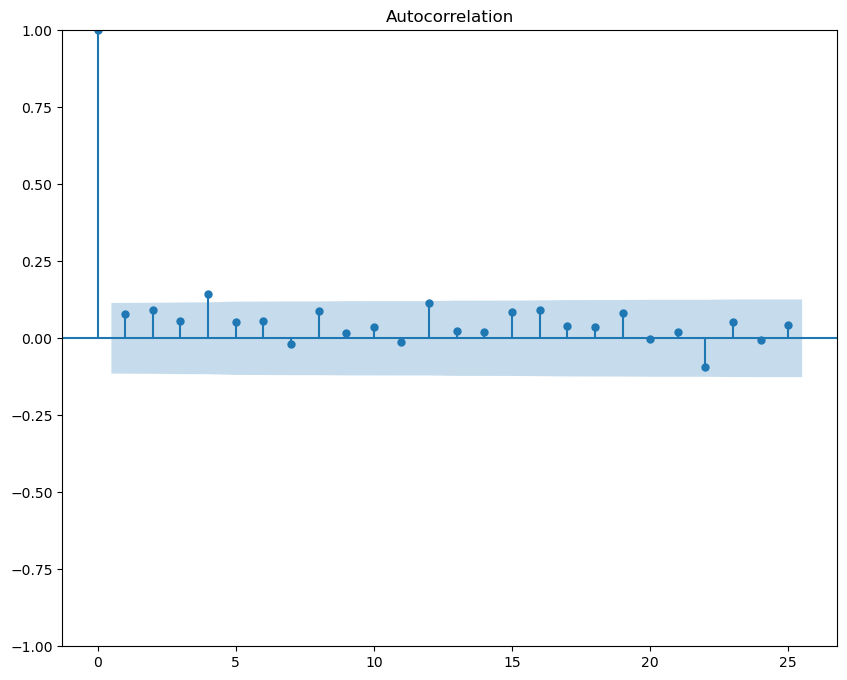

In [14]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

#acf and pacf are used to identify the parameter for ARIMA p, d and q

plot_acf(df)

D:\New folder\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


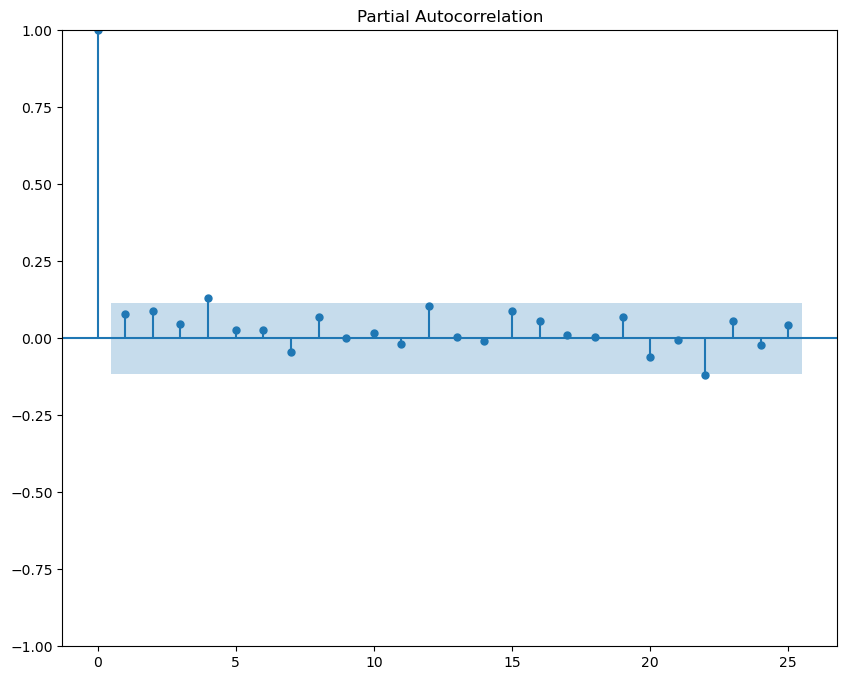

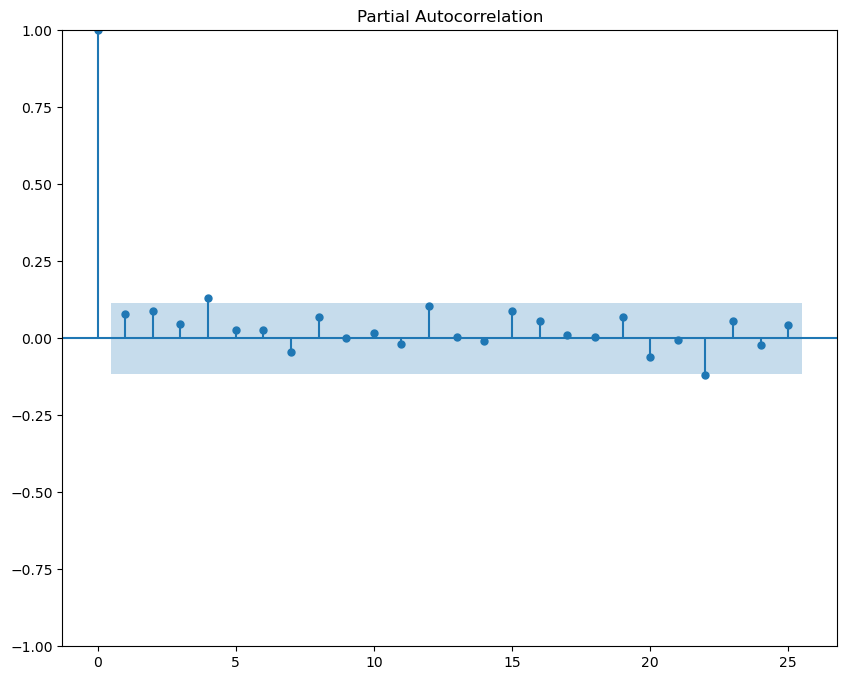

In [15]:
plot_pacf(df)

In [16]:
#  The parameters are p = 2,3 d = 1, q = 3,4

df.size

292

In [17]:
train = df[0:260]
test = df[260:292]

import statsmodels.tsa.arima.model as sarimax

# model = sarimax.ARIMA(train, order=(2, 1, 3))
# model_fit = model.fit()

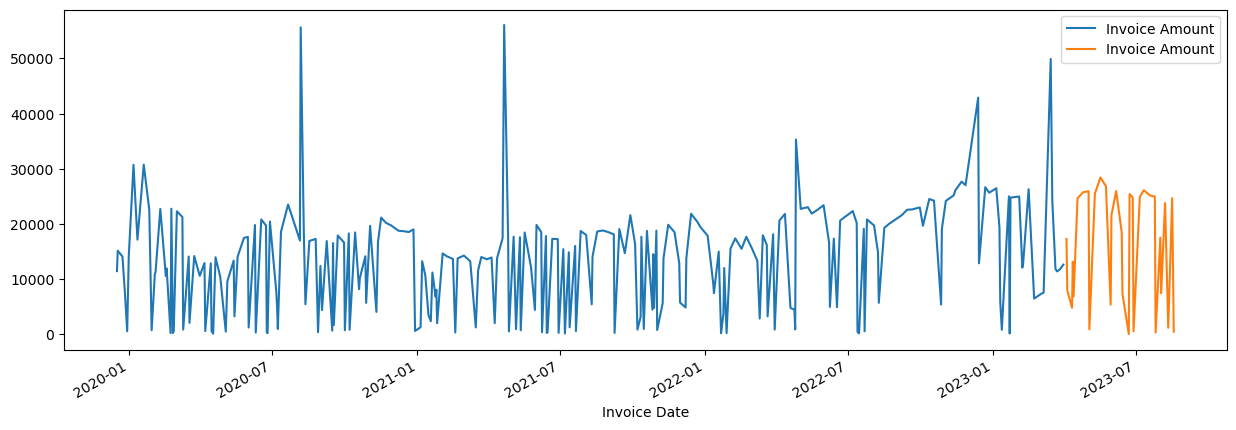

In [18]:
fig , ax = plt.subplots(figsize = (15,5))
train.plot(ax = ax , label = 'Training set')
test.plot(ax = ax, label = 'Test Set')
plt.show()

In [19]:
df_model = sarimax.ARIMA(train , order = (3,1,4)) 
model_fit = df_model.fit()

D:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\New folder\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\New folder\Lib\site-packages\st

In [20]:
model_fit.aic

5478.133014973058

In [21]:
df_forecast = model_fit.forecast(steps = 32)
df_forecast = df_forecast.head(32)

D:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [22]:
df_forecast

260    19607.171154
261    15979.139113
262    19271.226308
263    16434.935195
264    18788.629799
265    16984.859140
266    18261.289323
267    17532.982801
268    17776.165561
269    18003.655034
270    17395.976057
271    18348.069156
272    17155.305307
273    18545.623043
274    17061.546491
275    18600.966202
276    17099.530306
277    18538.057252
278    17238.408903
279    18392.705596
280    17439.340228
281    18204.979521
282    17662.707814
283    18012.593046
284    17873.941881
285    17846.011533
286    18047.402653
287    17725.615852
288    18168.176325
289    17660.899821
290    18231.963484
291    17651.390510
Name: predicted_mean, dtype: float64

In [23]:
np.sqrt(mean_squared_error(test , df_forecast))

10446.164284382865